## What is EDA ?
  
* Exploratory data analysis (EDA) is a task of analyzing data using simple tools from statistics, simple plotting tools.
* EDA is where one can use their creativity. Every field has the technology/science part and art part, here EDA is considered to be the art part for data scientist.
* The more creative we become with data more insights we can visualize. So, while performing EDA, always ask the right question, be more creative towards data and understand the pattern thoroughly.

## Why do we need EDA ?
* Every machine learning problem solving starts with EDA. It is probably one of the most important part of a machine learning project. With the growing market, the size of data is also growing. It becomes harder for companies to make decision without proper analyzing it.

* With the use of charts and certain graphs, one can make sense out of the data and check whether there is any relationship or not.
* Various plots are used to determine any conclusions. This helps the company to make a firm and profitable decisions. Once Exploratory Data Analysis is complete and insights are drawn, its feature can be used for supervised and unsupervised machine learning modelling.

## How can we perform EDA?
* There are a lot of tools where one can perform EDA. Programming languages used are mainly **R and Python**. Tools like **Tableau etc** are used which are often known as Business intelligence tools (BI).
* Talking about Python, we use certain libraries like **NumPy, Pandas, Matplotlib and seaborn for EDA.**
* Concerning exploratory data analysis (EDA), Pandas is typically used along with another plotting package, such as Matplotlib, Seaborn, Plotly, etc. After the data is all preprocessed through Pandas, it is then visualized using the chosen plotting package at hand.


## Dataset Link 
* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
* https://www.kaggle.com/gilsousa/habermans-survival-data-set

#### Features Details :
* **Age:** It represents the age of the patients undergone the surgery.
* **Year:** Year in which the patients had the operation.

* **Nodes:** A lymph node, or lymph gland is a kidney-shaped organ of the lymphatic system, and the adaptive immune system.

* **Status:** Denoted by 1 and 2. 1 means the patient survived 5 years or longer and 2 means the patient died within 5 year.

## Importing required libraries¶

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [306]:
data = pd.read_csv('dataset/haberman.csv')
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Check dataset and it's variables

In [307]:
data.shape

(306, 4)

In [308]:
data.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

In [309]:
data['age'].unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83])

In [310]:
data['year'].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

In [311]:
data['nodes'].unique()

array([ 1,  3,  0,  2,  4, 10,  9, 30,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28])

In [312]:
data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

### Check variables relationships

#### How should we know which features will give us better plots so that we can classify the information better. For that we use pairplots.

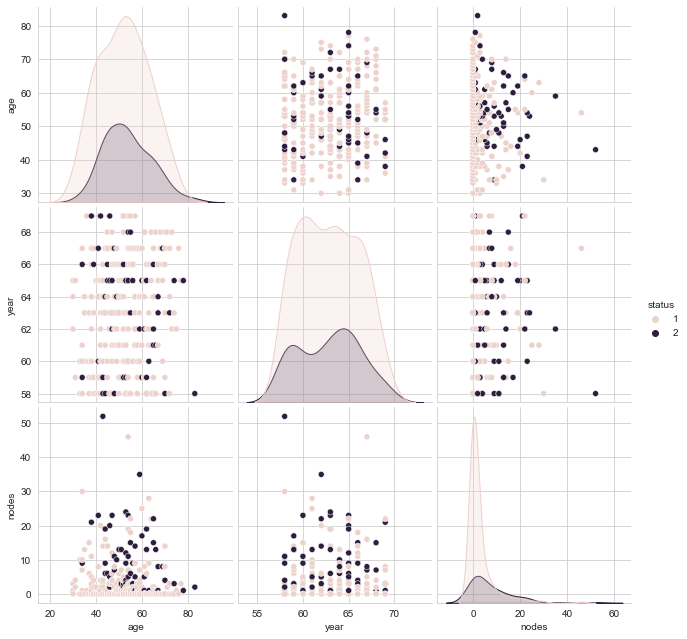

In [313]:
sns.set_style('whitegrid')
sns.pairplot(data, hue='status', height=3)
plt.show()

* Here there are 9 plots. The features are age, nodes and year. The reason why there is no status is because the plotting is done onthe basis of status. The legend is status.

* The plot 1, plot 5 and plot 9 are known as histograms.

* The plot 4 ,plot 7 and plot 8 are the inverted plots of plot 2, plot 3 and plot 6 respectively.

**Observations**

**Plot2** Here the plot is **age vs year**. It is certainly difficult to read and thus will reject this plot for any conclusion

**Plot3:** The plot is between **age and nodes**. It is also very hard to read and carry out any observations. so rejecting this plot too.

**Plot6:** This plot is fairly redable compared to the other two but certainly we cannot make any concrete observations based on this graph.

**Note:** Now the pair plots did not give a good reading about the case, will use other way to determine the information.

Text(0.5, 1.0, 'PDF of age')

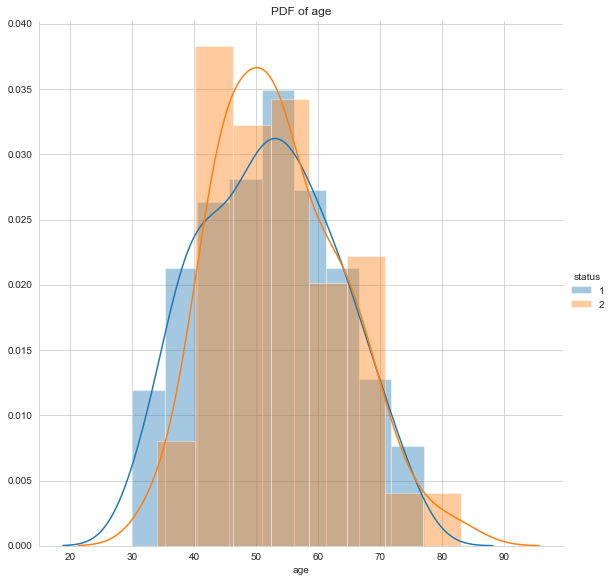

In [314]:
sns.FacetGrid(data, hue='status', height=8).map(sns.distplot, 'age').add_legend()
plt.title('PDF of age')

**Observations**

* This figure shows that the chances of survival between **40-70 (approx) age are same.**
* No other coclusion can be determined.

Text(0.5, 1.0, 'PDF of nodes')

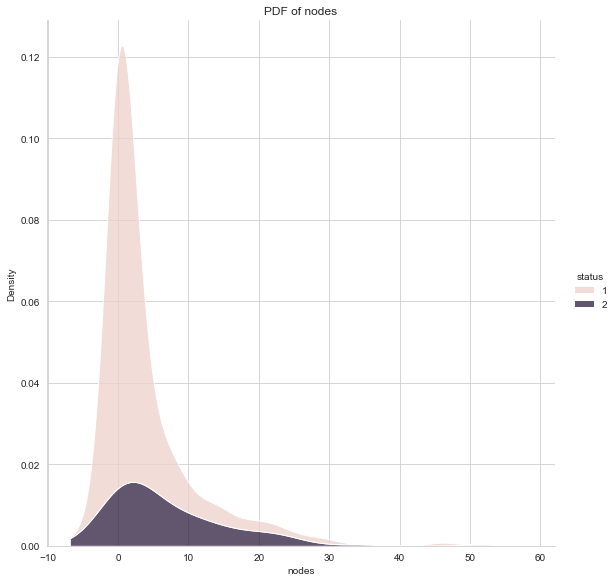

In [315]:
sns.displot(data, x="nodes", hue="status", multiple="stack", kind="kde", height = 8)
plt.title('PDF of nodes')

**Observations**

* Here we can see that the chances of long survival is the highest when the number of nodes are close to 0 , also the chances of long survival decreases with the increase in number of nodes. We can say that the chances of long survival are the least when the nodes > 25.


* when **nodes<=0**
    * person will live more than 5 years.
* **nodes>=0 and nodes<=5:**
    * person has good chance of surviving long.
* **nodes>5**
    * person will have short lifespan.

Text(0.5, 1.0, 'PDF of year')

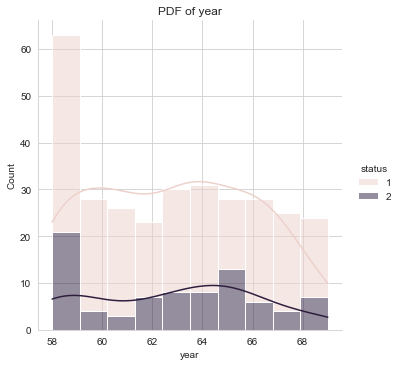

In [316]:
sns.displot(data, x="year", hue="status", multiple="stack", bins=10, kde=True)
plt.title('PDF of year')

Text(0.5, 1.0, 'PDF of year')

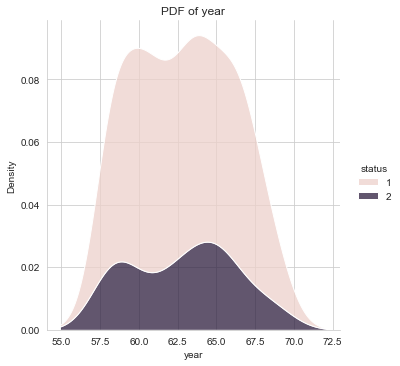

In [317]:
sns.displot(data, x="year", hue="status", multiple="stack", kind="kde")
plt.title('PDF of year')

Above two charts shows the same thing, it's just a matter of getting the same result by different ways.

**Observations**

* This figure shows that the chances of survival between **57.5 - 67.5 (approx) year are same.**
* No other coclusion can be determined.

1    225
2     81
Name: status, dtype: int64

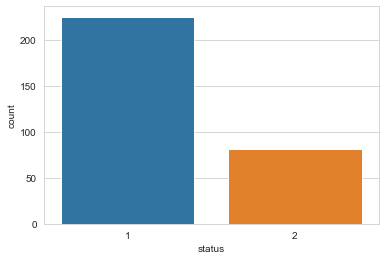

In [318]:
sns.countplot(x="status", data=data)
data['status'].value_counts()

**Observations**

* Here we can see 225 persons will live more than 5 years.
* Only 81 person will live less than 5 years.

In [319]:
nodes_status_1 = data.loc[data['status'] == 1]
nodes_status_2 = data.loc[data['status'] == 2]

In [320]:
nodes_status_1.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [321]:
nodes_status_2.head()

,age,year,nodes,status
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2


In [322]:
print('Medians of nodes with respect to status 1 and 2 ')
print('Status 1 : ', np.median(nodes_status_1['nodes']))
print('Status 2 : ', np.median(nodes_status_2['nodes']))

Medians of nodes with respect to status 1 and 2 
Status 1 :  0.0
Status 2 :  4.0


**Observations**

* Here, for the people survivng more than 5 years has nodes averaging to 0 whereas people who died within 5 years has nodes averaging to 4.

In [323]:
print('\nQuartiles of nodes with respect to status 1')
print("25th percentile of Status 1 : ", np.percentile(nodes_status_1['nodes'], 25))
print("50th percentile of Status 1 : ", np.percentile(nodes_status_1['nodes'], 50))
print("75th percentile of Status 1 : ", np.percentile(nodes_status_1['nodes'], 75))
print("95th percentile of Status 1 : ", np.percentile(nodes_status_1['nodes'], 95))

print('\nQuartiles of nodes with respect to status 2')
print("25th percentile of Status 2 : ", np.percentile(nodes_status_2['nodes'], 25))
print("50th percentile of Status 2 : ", np.percentile(nodes_status_2['nodes'], 50))
print("75th percentile of Status 2 : ", np.percentile(nodes_status_2['nodes'], 75))
print("95th percentile of Status 2 : ", np.percentile(nodes_status_2['nodes'], 95))


Quartiles of nodes with respect to status 1
25th percentile of Status 1 :  0.0
50th percentile of Status 1 :  0.0
75th percentile of Status 1 :  3.0
95th percentile of Status 1 :  14.0

Quartiles of nodes with respect to status 2
25th percentile of Status 2 :  1.0
50th percentile of Status 2 :  4.0
75th percentile of Status 2 :  11.0
95th percentile of Status 2 :  23.0


**Observations**

* From quantiles we can conclude that people living more than 5 years, 75% of them have 3 nodes or  50% of them has 0 nodes.
* On the other hand, for the people living less than 5 years, 50% of the people have 4 or less than 4 nodes and 75% of the people have less than or equal to 11 nodes.
* 95% percentile suggests that people surviving more than 5 years, 95% of them have less than or equal to 14 nodes present and on the other hand people surviving less than 5 years, have<=23 nodes.

Text(0.5, 1.0, 'Box plot')

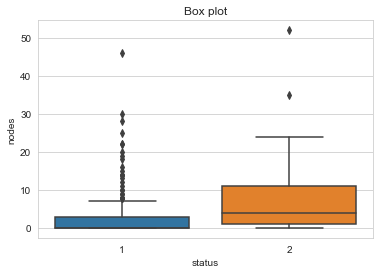

In [324]:
sns.boxplot(x='status',y='nodes',data=data)
plt.title('Box plot')

**Observations**

* The 25% and 50% of the category 1 is nearly the same. And it varies from 0 to 8. 75th% can be approx 4. On the other hand the category 2, the 50th% is equal to the 75th% percentile of the category 1.

* The category 2 varies from 0 to 25. The 75th% is approx 12. As its 50th% is nearly same as the 75th% of category 1, so of the nodes are between 0-8,there is 50% of error in category 2.